In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from fitter import Fitter


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [44]:
results = pd.read_csv("output_M_LCM.tsv", sep='\t')
results.head()
dates = pd.read_csv("competitions_dates_M_LCM.tsv", sep='\t')
dates.head()

,Distance,Meet,Year,Competition,Time
0,50,Free,2009,2009 Bulgaria Open,23.76
1,50,Free,2009,USC Invitational,24.24
2,50,Free,2009,Southern Cal Invitational,24.24
3,50,Free,2009,2009 Iowa Swimming Summer State,24.39
4,50,Free,2009,2009 Bulgaria Open,24.44


,Year,Competition,Dates
0,2009,2009 Bulgaria Open,"Jul. 10–12, 2009"
1,2009,USC Invitational,"Oct. 09–10, 2009"
2,2009,Southern Cal Invitational,"Oct. 09–10, 2009"
3,2009,2009 Iowa Swimming Summer State,"Jul. 30, 2009 - Aug. 02, 2009"
4,2009,2009 Bulgaria Boys Girls Senior Youth,"Jul. 03–05, 2009"


In [45]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
dates["Parsed_Dates"] = dates["Dates"].str.lower()

dates["Parsed_Dates"] = dates["Parsed_Dates"].str.replace(r'–.+', "")
dates["Parsed_Dates"] = dates["Parsed_Dates"].str.replace(r'-.+', "")
for month in months:
    
    month_cdf = dates["Parsed_Dates"].str.lower().str.contains(month.lower())
    month_ddf =  ""
    month_df = dates[month_cdf]
    month_df.head()

,Year,Competition,Dates,Parsed_Dates
19,2010,"UALR vs. North Texas, Henderson State","Jan. 06, 2010","jan. 06, 2010"
39,2011,Loras vs. East Carolina,"Jan. 01, 2011","jan. 01, 2011"
42,2012,Victorian Winter Championships,"Jan. 13–15, 2012",jan. 13
49,2012,Florida vs. Auburn,"Jan. 21, 2012","jan. 21, 2012"
92,2013,Saint Marys College of Maryland vs. Mary Washi...,"Jan. 10, 2013","jan. 10, 2013"


,Year,Competition,Dates,Parsed_Dates
12,2010,Last Chance Meet: Mountain West Conference,"Feb. 28, 2010","feb. 28, 2010"
14,2010,Last Chance Meet: Georgia - Long Course,"Feb. 28, 2010","feb. 28, 2010"
26,2011,Missouri Grand Prix (College Teams Only),"Feb. 18–21, 2011",feb. 18
34,2011,MWC Last Chance Meet - Long Course,"Feb. 27, 2011","feb. 27, 2011"
63,2012,USA Swimming Grand Prix - Missouri (18 & Under...,"Feb. 10–12, 2012",feb. 10


,Year,Competition,Dates,Parsed_Dates
13,2010,2010 Speedo Champions Series - Minneapolis,"Mar. 10–13, 2010",mar. 10
16,2010,2010 Bulgaria Men Women,"Mar. 19–21, 2010",mar. 19
18,2010,Last Chance Meet: Ohio State - LC,"Mar. 07, 2010","mar. 07, 2010"
24,2011,"2011 Speedo Sectionals - Indianapolis, IN","Mar. 24–27, 2011",mar. 24
28,2011,"2011 Speedo Sectionals - Fort Lauderdale, FL","Mar. 17–20, 2011",mar. 17


,Year,Competition,Dates,Parsed_Dates
97,2014,2014 Arena Grand Prix - Mesa,"Apr. 24–26, 2014",apr. 24
161,2015,Irish Open Swimming Championships,"Apr. 30, 2015 - May. 03, 2015","apr. 30, 2015"
240,2016,2016 CA TYR/MVN Fran Crippen Swim Meet of Cham...,"Apr. 28, 2016 - May. 01, 2016","apr. 28, 2016"
306,2016,Irish Long Course Championships 2016,"Apr. 28, 2016 - May. 01, 2016","apr. 28, 2016"
315,2016,2016 ST ASC Tax Refund Round U,"Apr. 15–17, 2016",apr. 15


,Year,Competition,Dates,Parsed_Dates
118,2014,2014 South Texas End of School Invite,"May. 16–18, 2014",may. 16
201,2015,Dallas Mustangs Senior Circuit #1,"May. 29–31, 2015",may. 29
219,2016,2016 NOVAQUATICS – SPEEDO GRAND CHALLENGE,"May. 27–29, 2016",may. 27
220,2016,2016 Arena Pro Swim Series at Charlotte,"May. 12–15, 2016",may. 12
234,2016,Atviras Lietuvos plaukimo čempionatas,"May. 26–28, 2016",may. 26


,Year,Competition,Dates,Parsed_Dates
5,2009,2009 Bulgaria Boys Girls Junior,"Jun. 26–28, 2009",jun. 26
41,2012,USA Olympic Team Trials,"Jun. 25, 2012 - Jul. 02, 2012","jun. 25, 2012"
46,2012,2012 United States Olympic Team Trials - 18 & ...,"Jun. 25, 2012 - Jul. 02, 2012","jun. 25, 2012"
59,2012,2012 United States Olympic Team Trials - 18 & ...,"Jun. 25, 2012 - Jul. 02, 2012","jun. 25, 2012"
70,2012,MT MAC Firecracker Classic,"Jun. 21–24, 2012",jun. 21


,Year,Competition,Dates,Parsed_Dates
0,2009,2009 Bulgaria Open,"Jul. 10–12, 2009",jul. 10
3,2009,2009 Iowa Swimming Summer State,"Jul. 30, 2009 - Aug. 02, 2009","jul. 30, 2009"
4,2009,2009 Bulgaria Boys Girls Senior Youth,"Jul. 03–05, 2009",jul. 03
6,2010,2010 Speedo Champions Series - Athens,"Jul. 15–18, 2010",jul. 15
8,2010,2010 Speedo Champions Series - California,"Jul. 24, 2010","jul. 24, 2010"


,Year,Competition,Dates,Parsed_Dates
7,2010,2010 Junior National Championships,"Aug. 09–13, 2010",aug. 09
9,2010,2010 YMCA Long Course Nationals,"Aug. 02, 2010","aug. 02, 2010"
10,2010,2010 Speedo Champions Series - Mt. Hood,"Aug. 02, 2010","aug. 02, 2010"
11,2010,2010 Speedo Champions Series - Gainesville (Be...,"Aug. 02, 2010","aug. 02, 2010"
23,2011,2011 USA Swimming Junior Nationals,"Aug. 08–12, 2011",aug. 08


,Year,Competition,Dates,Parsed_Dates
108,2014,Victorian Age Championships,"Sep. 05–07, 2014",sep. 05
209,2015,Cleveland State Splash Bash,"Sep. 26, 2015","sep. 26, 2015"
279,2016,NCSA Summer Swimming Championship,"Sep. 27, 2016 - Aug. 13, 2016","sep. 27, 2016"
334,2016,"Michigan State vs. Iowa, Notre Dame","Sep. 30, 2016","sep. 30, 2016"
557,2017,New Zealand Secondary School Champs,"Sep. 15–17, 2017",sep. 15


,Year,Competition,Dates,Parsed_Dates
1,2009,USC Invitational,"Oct. 09–10, 2009",oct. 09
2,2009,Southern Cal Invitational,"Oct. 09–10, 2009",oct. 09
32,2011,Florida vs. Georgia,"Oct. 28, 2011","oct. 28, 2011"
33,2011,"Michigan State vs. Cleveland State, Oakland","Oct. 08, 2011","oct. 08, 2011"
127,2014,2014 Gulf Open Water Swimming,"Oct. 05, 2014","oct. 05, 2014"


,Year,Competition,Dates,Parsed_Dates
27,2011,Tennessee Invitational,"Nov. 16–18, 2011",nov. 16
31,2011,Pittsburgh Invitational,"Nov. 18–20, 2011",nov. 18
35,2011,"Navy vs. American, Bucknell, Lafayette","Nov. 05, 2011","nov. 05, 2011"
121,2014,Clarkson vs. Saint Michaels,"Nov. 15, 2014","nov. 15, 2014"
135,2015,Tennessee Invitational,"Nov. 20–23, 2015",nov. 20


,Year,Competition,Dates,Parsed_Dates
25,2011,2012 AT&T National Championships (18 & Unders),"Dec. 01–03, 2011",dec. 01
36,2011,Cal Poly vs. UC-San Diego,"Dec. 18, 2011","dec. 18, 2011"
45,2012,Victorian Age Championships,"Dec. 18–23, 2012",dec. 18
90,2013,Delta State Christmas Invitational,"Dec. 14–17, 2013",dec. 14
123,2014,Delta State Invitational,"Dec. 13–16, 2014",dec. 13


In [ ]:
years = {}
for year in range(2009, 2020):
    years[str(year)] = results["Year"] == year
    
years["2009"].head()

In [ ]:
competitions_per_year = {}
for year in range(2009, 2020):
    competitions_per_year[str(year)] = results[years[str(year)]]["Competition"].drop_duplicates(keep ='first')


    

In [ ]:
competitions_per_year["2011"]

In [ ]:
# competitions = list(map(lambda x:x, competitions.keys()))
# competitions
with open("competitions_M_LCM.tsv", "w+", encoding="utf-8") as out:
    for year in range(2009,2020):
        for comp in competitions_per_year[str(year)]:
            out.write("{0}\t{1}\n".format(comp, year))
    

In [ ]:
competitions_df = pd.read_csv("competitions_M_LCM.tsv", sep='\t')
competitions_df.head()

In [39]:
standard_times_df = pd.read_csv("Swimming Standard Times.csv")
standard_times_df.head()

,Event,Amateur,Intermediate Upper,Intermediate Lower,Professional
0,50 Free,26,26,23,23
1,100 Free,58,58,52,52
2,200 Free,2:01,2:01,1:52,1:52
3,400 Free,4:30,4:30,4:00,4:00
4,800 Free,9:50,9:15,8:12,8:12


In [ ]:
free = results["Meet"] == 'Free'
free_df = results[free]


free_50 = free_df["Distance"] == 50
free_50_df = free_df[free_50]
free_50_df["Time_Numeric"] = pd.to_timedelta(free_50_df["Time"], unit="sec", errors="ignore")
free_50_df.sort_values(by=["Time_Numeric"])
free_50_df.head()


In [40]:
from datetime import timedelta
def to_timedelta(s):
    split = s.split(":")
    hours = 0
    minutes = 0
    seconds = ""
    milliseconds = 0
    if len(split) == 3:
        hours = int(split[0])
        minutes = int(split[1])
        seconds = split[2]
    elif len(split) == 2:
        minutes = int(split[0])
        seconds = split[1]
    else:
        seconds = split[0]
    seconds_split = seconds.split(".")
    if len(seconds_split) == 2:
        if len(seconds_split[1]) == 1:
            milliseconds = int(seconds_split[1])*100
        elif len(seconds_split[1]) == 2:
            milliseconds = int(seconds_split[1])*10
        else:
            milliseconds = int(seconds_split[1])
        return timedelta(hours=hours, minutes=minutes, seconds=int(seconds_split[0]), milliseconds=milliseconds)
    else:
        return timedelta(hours=hours, minutes=minutes, seconds=int(seconds_split[0]))
    

In [41]:
standard_times_df["Amateur"] = standard_times_df["Amateur"].apply(to_timedelta)
standard_times_df["Intermediate Upper"] = standard_times_df["Intermediate Upper"].apply(to_timedelta)
standard_times_df["Intermediate Lower"] = standard_times_df["Intermediate Lower"].apply(to_timedelta)
standard_times_df["Professional"] = standard_times_df["Professional"].apply(to_timedelta)
standard_times_df.head()

,Event,Amateur,Intermediate Upper,Intermediate Lower,Professional
0,50 Free,00:00:26,00:00:26,00:00:23,00:00:23
1,100 Free,00:00:58,00:00:58,00:00:52,00:00:52
2,200 Free,00:02:01,00:02:01,00:01:52,00:01:52
3,400 Free,00:04:30,00:04:30,00:04:00,00:04:00
4,800 Free,00:09:50,00:09:15,00:08:12,00:08:12


In [46]:
# results_td = results
# results_td = pd.read_csv("results_td.csv")
results["Time"] = results["Time"].apply(to_timedelta).dt.total_seconds()
results.head()

,Distance,Meet,Year,Competition,Time
0,50,Free,2009,2009 Bulgaria Open,23.76
1,50,Free,2009,USC Invitational,24.24
2,50,Free,2009,Southern Cal Invitational,24.24
3,50,Free,2009,2009 Iowa Swimming Summer State,24.39
4,50,Free,2009,2009 Bulgaria Open,24.44


In [47]:
import re
def label_skills(row):
#     print("{0} {1}".format(row[0], row[1]))
    event = standard_times_df["Event"] == row[5]
    event_df = standard_times_df[event]
#     print(len(event_df["Amateur"]))
    event_df = event_df.reset_index()
    amateur_time = event_df["Amateur"][0]
    pro_time = event_df["Professional"][0]
    if row[4] > amateur_time:
        return 1
    elif row[4] <= pro_time:
        return 3
    return 2

def merge_distance_meet(row):
    return "{0} {1}".format(row[0], row[1])

def form_str(row):
    event = re.sub("Fly", "Butterfly", row)
    return event

In [71]:
events_codes = pd.read_csv("Events.csv", index_col="Event", squeeze=True)
# results["Event"] = results.apply(merge_distance_meet, axis=1)
# results["Event"] = results["Event"].apply(form_str)
# results["Event"] = results["Event"].map(events_codes)
# results.head()
# standard_times_df["Event"] = standard_times_df["Event"].map(events_codes)
# standard_times_df["Amateur"] = standard_times_df.Amateur.dt.total_seconds()
# standard_times_df["Intermediate Upper"] = standard_times_df["Intermediate Upper"].dt.total_seconds()
# standard_times_df["Intermediate Lower"] = standard_times_df["Intermediate Lower"].dt.total_seconds()
# standard_times_df["Professional"] = standard_times_df.Professional.dt.total_seconds()


# results_td = pd.read_csv("results_td.csv")
# results_td["seconds"] = results_td["Time"].dt.total_seconds()

# results.dtypes



# results_d = results_td["Event"].isin(standard_times_df["Event"])
# keys = list(standard_times_df["Event"].columns.values)
# i1 = df1.set_index(keys).index
# i2 = df2.set_index(keys).index
# results_td_new = 
# results_td[results_d].head()


# results_td = results_td[["Distance", "Meet", "Year", "Competition", "Time", "Event"]]
# results = results[results["Event"] >= 0]
# results_td.head()

# results["Skill_Level"] = results.apply(label_skills, axis=1)
results.head()

,Distance,Meet,Year,Competition,Time,Event,Split,Reps,Skill_Level
0,50,Free,2009,2009 Bulgaria Open,23.76,0.0,23.76,1.0,2
1,50,Free,2009,USC Invitational,24.24,0.0,24.24,1.0,2
2,50,Free,2009,Southern Cal Invitational,24.24,0.0,24.24,1.0,2
3,50,Free,2009,2009 Iowa Swimming Summer State,24.39,0.0,24.39,1.0,2
4,50,Free,2009,2009 Bulgaria Open,24.44,0.0,24.44,1.0,2


In [58]:
# results_td["Split_Mean"] =  results_(results_td["Distance"]/50)
def get_split_mean(row):
    laps = row[0] / 50
    time = row[4]
    mean_time = time / laps
    return laps

results["Reps"] = results.apply(get_split_mean, axis=1)

# results_td["Time"][0] / 1
results.tail()

,Distance,Meet,Year,Competition,Time,Event,Split,Reps
387680,400,IM,2019,ST TXLA Long Course TAGS,282.82,16.0,35.35250,8.0
387681,400,IM,2019,Scottish National Age Group Championships,282.83,16.0,35.35375,8.0
387682,400,IM,2019,Campeonatos Nacionais Juvenis e Absolutos de P...,282.83,16.0,35.35375,8.0
387683,400,IM,2019,Central Zone (WI) Age Group Championship,282.84,16.0,35.35500,8.0
387684,400,IM,2019,"VA TIDE Speedo Red, White and Blue",282.84,16.0,35.35500,8.0


In [ ]:
reps = results_td[results_td["Meet"].str.contains("Free")]["Reps"].max()
distance = results_td[results_td["Meet"].str.contains("Free")]["Distance"].max()
reps
# distance
# results_td.to_csv("results_td.csv", index=False)
type(results_td["Time"][0])

In [67]:
results[results.index == 97076]

,Distance,Meet,Year,Competition,Time,Event,Split,Reps
97076,150,Free,2014,2014 Phillips 66 National Championships,21.55,NaN,7.183333,3.0


In [5]:
# fre[["Distance", "Meet", "seconds", "Skill_Level"]][fre["Skill_Level"] == 1].to_csv("testing_with_skills_1.csv")

# amateurs = results_td[["Event", "Distance", "Meet", "Reps", "seconds", "Split", "Skill_Level"]][results_td["Skill_Level"] == 1]

intermediates_dff = results_td[["Event", "Distance", "Meet", "Reps", "seconds", "Split", "Skill_Level"]][results_td["Skill_Level"] == 2]

# pros = results_td[["Event", "Distance", "Meet", "Reps", "seconds", "Split", "Skill_Level"]][results_td["Skill_Level"] == 3]

# a_ax = amateurs[amateurs["Event"] == 15]["seconds"].plot.kde()
# a_ax.set_xlim(left=15, right=35)
# amateurs_std = amateurs.seconds.std(axis=0, skipna=True)
# amateurs_mean = amateurs.seconds.mean()
# round(amateurs_mean + amateurs_std, 2)

all_roles_intermediates = []
all_axis = []

# for r in range(0, 17):
# temp = intermediates[intermediates["Event"] == r]
all_backs = intermediates[intermediates["Event"] > 5]
all_backs = all_backs[all_backs["Event"] < 9] 
all_roles_intermediates.append(all_backs)

all_breasts = intermediates[intermediates["Event"] > 11]
all_breasts = all_breasts[all_breasts["Event"] < 15] 
all_roles_intermediates.append(all_breasts)

all_butterflies = intermediates[intermediates["Event"] > 8]
all_butterflies = all_butterflies[all_butterflies["Event"] < 12] 
all_roles_intermediates.append(all_butterflies)


# all_butterflies = intermediates[intermediates["Event"] > 8]
# all_butterflies = all_butterflies[all_butterflies["Event"] < 12] 
# all_roles_intermediates.append(all_butterflies)

# all_drills

all_frees = intermediates[intermediates["Event"] < 6]
all_roles_intermediates.append(all_frees)

all_ims = intermediates[intermediates["Event"] > 15]
all_roles_intermediates.append(all_ims)








# temp_axis = temp["seconds"].plot.kde()
# temp_axis.set_xlim(left=0)
# all_axis.append(temp_axis)

# i_ax = intermediates["seconds"].plot.kde()
# i_ax.set_xlim(left=0)
# intermediates_std = intermediates.seconds.std(axis=0, skipna=True)
# intermediates_mean = intermediates.seconds.mean()
# round(intermediates_mean + intermediates_std, 2)

# p_ax = pros["seconds"].plot.kde()
# # p_ax.set_xlim(left=15, right=35)
# pros_std = pros.seconds.std(axis=0, skipna=True)
# pros_mean = pros.seconds.mean()
# round(pros_mean + pros_std, 2)
# for r in range(0, 18)
# stats = {}







# a_ax
# i_ax
# p_ax
# x, y = ecdf(amateurs["seconds"])
# plt.figure(figsize=(8,7))
# sns.set()
# plt.plot(x, y, marker=".", linestyle="none")
# plt.xlabel("Elapsed Time (s)")
# plt.ylabel("Cumulative Distribution Function")




# fre["seconds"] = fre.Time_Numeric.dt.total_seconds()
# fre.head()
# fre.sort_values(by=["seconds"])

# # val = fre[["Distance", "Meet", "Time_Numeric", "Skill_Level"]][fre["Skill_Level"] == 1]
# fre['Zscore'] = fre.groupby('Skill_Level').seconds.apply(lambda x: x.div(x.mean()))
# fre.groupby('Skill_Level').Zscore.plot.kde()

# g = fre.groupby('Skill_Level').Zscore
# n = g.ngroups
# fig, axes = plt.subplots(n // 2, 2, figsize=(6, 6), sharex=True, sharey=True)
# for i, (name, group) in enumerate(g):
#     r, c = i // 2, i % 2
#     group.plot.kde(title=name, ax=axes[r, c])
# fig.tight_layout()

In [3]:
temp_df = pd.read_csv("temp.csv")
temp_df.head()

,Distance,Meet,Year,Competition,Time,Event,Split,Reps,Skill_Level
0,50,Free,2014,Victorian Age Championships,26.14,0.0,26.14,1.0,1
1,50,Free,2015,2015 Phillips 66 National Championships,23.48,0.0,23.48,1.0,2
2,50,Free,2016,2016 Speedo Sectionals Championship Series,24.63,0.0,24.63,1.0,2
3,50,Free,2009,2009 Bulgaria Boys Girls Junior,29.66,0.0,29.66,1.0,1
4,50,Free,2018,Edinburgh International Swim Meet,23.84,0.0,23.84,1.0,2


In [9]:
stats.

<module 'scipy.stats' from 'c:\\users\\luisr\\miniconda3\\envs\\coaching-env\\lib\\site-packages\\scipy\\stats\\__init__.py'>

In [5]:
results = pd.read_csv("allResults.csv")
results.head()
# for i in range(0,17):
#     tem = results[results.Event == i]
#     tem = tem[tem.Skill_Level == 2]
#     tem.to_csv("temp_{0}.csv".format(i), index=False)
    

,Distance,Meet,Year,Competition,Time,Event,Split,Reps,Skill_Level
0,50,Free,2009,2009 Bulgaria Open,23.76,0.0,23.76,1.0,2
1,50,Free,2009,USC Invitational,24.24,0.0,24.24,1.0,2
2,50,Free,2009,Southern Cal Invitational,24.24,0.0,24.24,1.0,2
3,50,Free,2009,2009 Iowa Swimming Summer State,24.39,0.0,24.39,1.0,2
4,50,Free,2009,2009 Bulgaria Open,24.44,0.0,24.44,1.0,2


In [ ]:
inter = results[results.Skill_Level == 2]

inter.


In [10]:
dists = ['beta', 'chi','chi2', 'norm', 'expon', 'f', 'gamma', 'gumbel_l',
        'gumbel_r', 'laplace', 'logistic', 'lognorm', 'norm', 'pareto', 
         'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 't', 'triang',
         'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_max',
         'weibull_min'
        ]

temp = results[results.Skill_Level == 2]

summaries = []
# temp = temp.astype({'Event': 'int32'})
# temp.dtypes
for i in range(0, 17):
    tem = temp[temp.Event == i]
    f = Fitter(tem.Split, distributions=dists, timeout=56400)
    f.fit()
    summaries.append(f)
# tem = temp[results.Event == 5]
# tem.head()
# f = Fitter(temp_df.Time, distributions=['lognorm'], timeout=56400)
# f.fit()
# f.summary()
# summaries.insert(0, f.summary())

Fitted beta distribution with error=0.5613030737000881)
Fitted chi distribution with error=0.3463566935486538)
Fitted chi2 distribution with error=3.568264111203593)
Fitted norm distribution with error=0.9047057094848414)
Fitted expon distribution with error=4.016704313174409)


c:\users\luisr\miniconda3\envs\coaching-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Fitted f distribution with error=0.4090633501424999)
Fitted gamma distribution with error=0.36545543414074244)
Fitted gumbel_l distribution with error=2.2592787845504247)
Fitted gumbel_r distribution with error=0.40081705232873766)
Fitted laplace distribution with error=1.367325091541248)
Fitted logistic distribution with error=0.8607643980229398)
Fitted lognorm distribution with error=0.3948796668165161)
Fitted norm distribution with error=0.9047057094848414)
Fitted pareto distribution with error=4.326326380235901)
Fitted powerlaw distribution with error=2.1364363768947805)


c:\users\luisr\miniconda3\envs\coaching-env\lib\site-packages\scipy\stats\_continuous_distns.py:5737: RuntimeWarning: divide by zero encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
c:\users\luisr\miniconda3\envs\coaching-env\lib\site-packages\scipy\stats\_continuous_distns.py:5737: RuntimeWarning: invalid value encountered in multiply
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
c:\users\luisr\miniconda3\envs\coaching-env\lib\site-packages\scipy\stats\_continuous_distns.py:5737: RuntimeWarning: overflow encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))


Fitted powerlognorm distribution with error=0.36804560712066103)


c:\users\luisr\miniconda3\envs\coaching-env\lib\site-packages\scipy\stats\_continuous_distns.py:5774: RuntimeWarning: divide by zero encountered in power
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))
c:\users\luisr\miniconda3\envs\coaching-env\lib\site-packages\scipy\stats\_continuous_distns.py:5774: RuntimeWarning: overflow encountered in power
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))
c:\users\luisr\miniconda3\envs\coaching-env\lib\site-packages\scipy\stats\_continuous_distns.py:5774: RuntimeWarning: invalid value encountered in multiply
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))


Fitted powernorm distribution with error=nan)
Fitted rayleigh distribution with error=0.3701725774953071)
Fitted t distribution with error=0.9046818276481018)
Fitted triang distribution with error=0.3666201506078092)
Fitted uniform distribution with error=2.2006647025767094)
Fitted vonmises distribution with error=4.1352524655090234e+57)
Fitted vonmises_line distribution with error=1.611292158692038)
Fitted wald distribution with error=2.309730685355034)
Fitted weibull_max distribution with error=0.4297981467012128)
Fitted weibull_min distribution with error=0.34599110314648623)


c:\users\luisr\miniconda3\envs\coaching-env\lib\site-packages\scipy\stats\_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Fitted beta distribution with error=0.49024205732203296)
Fitted chi distribution with error=0.5031086345415658)
Fitted chi2 distribution with error=7.794832676825538)
Fitted norm distribution with error=2.917710843533024)
Fitted expon distribution with error=1.0137287997595463)
Fitted f distribution with error=0.7167133823827826)
Fitted gamma distribution with error=0.7167113537488018)
Fitted gumbel_l distribution with error=4.333714444975984)
Fitted gumbel_r distribution with error=1.7811434342256347)
Fitted laplace distribution with error=3.349789838459831)
Fitted logistic distribution with error=2.8339210220774906)
Fitted lognorm distribution with error=1.2375606900795895)
Fitted norm distribution with error=2.917710843533024)
Fitted pareto distribution with error=1.1336847300706803)
Fitted powerlaw distribution with error=1.6149200918311426)
Fitted powerlognorm distribution with error=1.0148618959722304)
Fitted powernorm distribution with error=nan)
Fitted rayleigh distribution wit

Fitted lognorm distribution with error=0.368479816234165)
Fitted norm distribution with error=0.37018500286069667)
Fitted pareto distribution with error=3.406236718849479)
Fitted powerlaw distribution with error=0.7070630268057821)
Fitted powerlognorm distribution with error=0.3685183457726707)
Fitted powernorm distribution with error=0.365267925528324)
Fitted rayleigh distribution with error=0.5313870918766445)
Fitted t distribution with error=0.3702297822954832)
Fitted triang distribution with error=0.2977211694790751)
Fitted uniform distribution with error=0.8675706462996895)
Fitted vonmises distribution with error=6.518073781676444e+56)
Fitted vonmises_line distribution with error=0.2231110948883792)
Fitted wald distribution with error=2.1586274540342107)
Fitted weibull_max distribution with error=7.089980188379214)
Fitted weibull_min distribution with error=0.34645280967439346)
Fitted beta distribution with error=0.3290506039854655)
Fitted chi distribution with error=0.29151480989

Fitted vonmises distribution with error=1.9769798662238695e+55)
Fitted vonmises_line distribution with error=0.13146940023001627)
Fitted wald distribution with error=2.6727567711290954)
Fitted weibull_max distribution with error=0.34683209953418237)
Fitted weibull_min distribution with error=0.33715354189380237)
Fitted beta distribution with error=0.2448588028563317)
Fitted chi distribution with error=0.491089004141295)
Fitted chi2 distribution with error=0.5363201719445081)
Fitted norm distribution with error=0.4739763128475194)
Fitted expon distribution with error=3.414073731651728)
Fitted f distribution with error=0.4837161720087147)
Fitted gamma distribution with error=0.5230313688987116)
Fitted gumbel_l distribution with error=0.3992535780786297)
Fitted gumbel_r distribution with error=0.9905412037069471)
Fitted laplace distribution with error=0.88061190661372)
Fitted logistic distribution with error=0.5265534791065254)
Fitted lognorm distribution with error=0.486216675555254)
Fit

,sumsquare_error
weibull_min,0.345991
chi,0.346357
gamma,0.365455
triang,0.366620
powerlognorm,0.368046


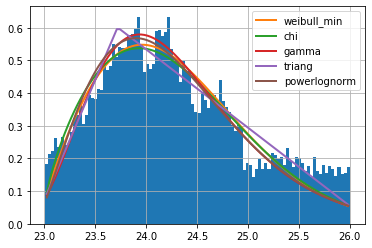

In [11]:
summaries[0].summary()

In [17]:
temp[temp.Event == 0].Split.mean() - 2*temp[temp.Event == 0].Split.std()

22.818205668410133

In [13]:
summaries[0].get_best()["weibull_min"]

(1.8955350456538675, 22.941137702001583, 1.5137563439325117)

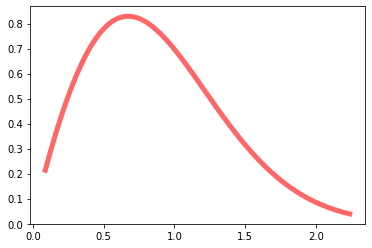

In [20]:
fig, ax = plt.subplots(1, 1)
dist = stats.weibull_min
param = summaries[0].get_best()["weibull_min"]
x = np.linspace(stats.weibull_min.ppf(0.01, param[0]), stats.weibull_min.ppf(0.99, param[0]), 100)
fitted = dist.pdf(x, param[0])
ax.plot(x, fitted,'r-', lw=5, alpha=0.6, label='weibull_min pdf')

In [91]:
len(percentiles)

5001

In [100]:
temp = results[results.Skill_Level == 2]
# temp = temp[temp.Event > 11]

# for role in range(0,17):
percentiles = np.percentile(temp.Split, [0.001*i for i in range(0, 1001)])
pd.DataFrame(percentiles, columns=['Split']).to_csv('allPercentiles.csv', index=False)
# for per in range(1, 101, 2):
#     temp_v = temp[temp.Event == role].Split
#     temp_v = temp_v[temp_v.Split < percentiles[per]]
#     temp_v = temp_v[temp_v.Split >= percentiles[per-1]]
    
#     values.extend(list(temp_v.Split))
# len(percentiles)
# [0.005*i for i in range(0, 201)][200]
    
# np.percentile(temp[temp.Event == 0].Split, 100/5000+2)

In [130]:
res = results[results.Event == 0].sample(frac=1).reset_index(drop=True)
res.to_csv("temp.csv", index=False)

,sumsquare_error
triang,0.453717
beta,0.490242
chi,0.503109
weibull_min,0.678429
gamma,0.716711


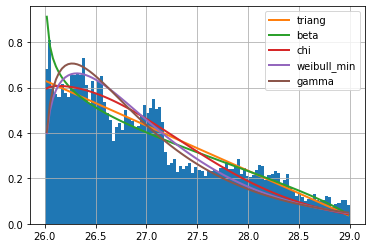

In [34]:
summaries[1].summary()

,sumsquare_error
beta,0.477713
chi,0.796884
rayleigh,0.840211
triang,0.847367
weibull_min,0.857164


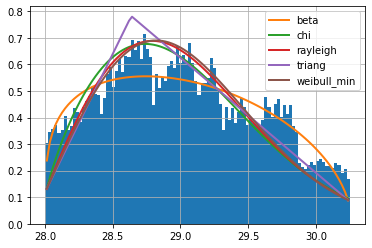

In [35]:
summaries[2].summary()

,sumsquare_error
chi,0.210028
weibull_min,0.223035
beta,0.257493
gamma,0.266625
powerlognorm,0.289575


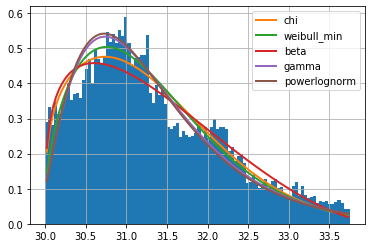

In [37]:
summaries[3].summary()

In [39]:
summaries[3].get_best()

{'chi': (1.2786843471669411, 29.99830447549995, 1.3972562928916543)}

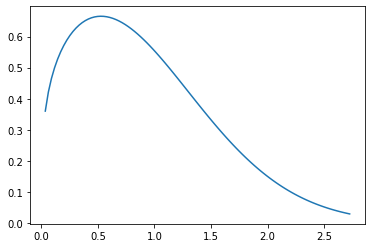

In [48]:
fig, ax = plt.subplots(1, 1)
dist = stats.chi
param = summaries[3].get_best()["chi"]
x = np.linspace(stats.chi.ppf(0.01, param[0]), stats.chi.ppf(0.99, param[0]), 100)
fitted = dist.pdf(x, param[0])
ax.plot(x, fitted, label='chi pdf')

In [49]:
stats.kstest('chi','chi', param)

KstestResult(statistic=0.16443990493336413, pvalue=0.610965508783779)

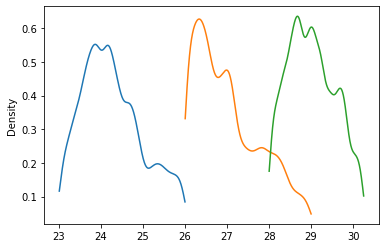

In [196]:
# code = 1
for code in range(0,3):
    temp[temp.Event == code].Split.plot.kde(ind =np.linspace(temp[temp.Event == code].Split.min(),temp[temp.Event == code].Split.max(), 1000) )

,sumsquare_error
norm,0.077499
t,0.077499
f,0.089106
weibull_min,0.089236
lognorm,0.089717


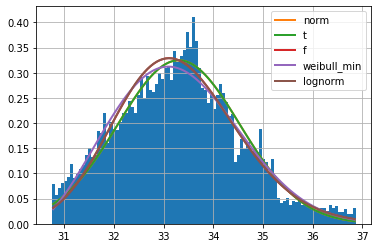

In [109]:
summaries[4].summary()

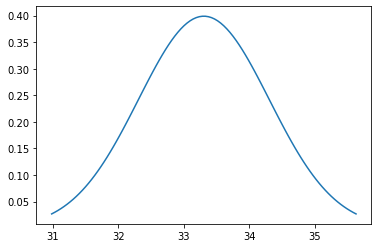

In [53]:

fig, ax = plt.subplots(1, 1)
dist = stats.norm
param = summaries[4].get_best()["norm"]
x = np.linspace(stats.norm.ppf(0.01, param[0]), stats.norm.ppf(0.99, param[0]), 100)
fitted = dist.pdf(x, param[0])
ax.plot(x, fitted, label='norm pdf')

In [197]:
summaries[4].get_best()["norm"]

(33.307553151288126, 1.2283859638254984)

In [198]:
k2, p = stats.normaltest(temp[temp.Event == 4].Split)
print("k2: " + str(k2), "p: " + str(p), sep="\n")

k2: 192.75559057709273
p: 1.3920515819212155e-42


In [71]:
stats.kstest('norm','norm', param)


KstestResult(statistic=0.14508254150929267, pvalue=0.7864290804782098)

,sumsquare_error
triang,0.165409
beta,0.173381
vonmises_line,0.257961
gumbel_l,0.275025
powerlognorm,0.281598


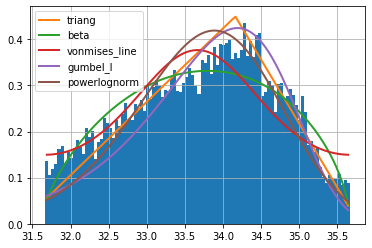

In [65]:
summaries[5].summary()

,sumsquare_error
vonmises_line,0.223111
triang,0.297721
weibull_min,0.346453
powernorm,0.365268
f,0.365502


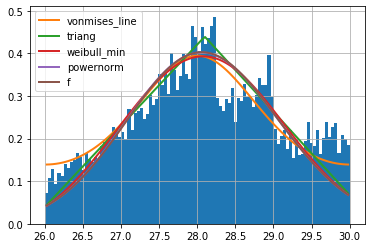

In [111]:
summaries[6].summary()

,sumsquare_error
triang,0.214180
weibull_min,0.255671
f,0.278747
gamma,0.281934
lognorm,0.283133


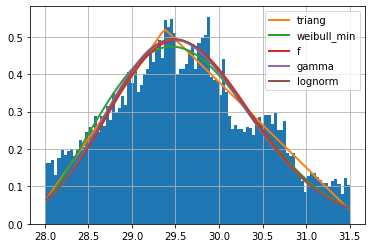

In [112]:
summaries[7].summary()

,sumsquare_error
triang,0.191650
gamma,0.228892
chi2,0.228892
lognorm,0.231827
rayleigh,0.232230


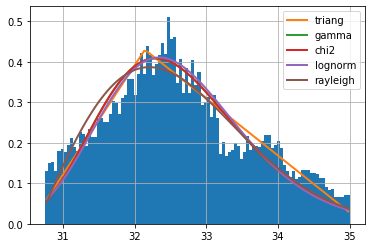

In [113]:
summaries[8].summary()

,sumsquare_error
beta,0.441865
weibull_max,0.526676
triang,0.570388
weibull_min,0.663587
powernorm,0.677806


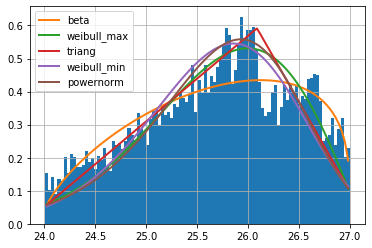

In [115]:
summaries[9].summary()

,sumsquare_error
vonmises_line,0.322345
triang,0.335698
beta,0.344991
weibull_min,0.395223
powerlognorm,0.420405


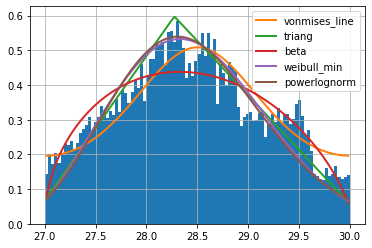

In [116]:
summaries[10].summary()

,sumsquare_error
vonmises_line,0.131469
triang,0.269553
weibull_min,0.337154
weibull_max,0.346832
f,0.355643


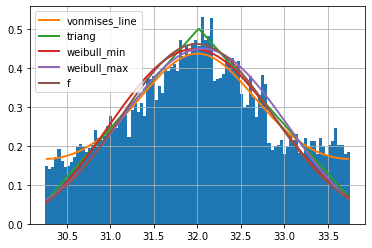

In [117]:
summaries[11].summary()

,sumsquare_error
beta,0.244859
weibull_max,0.284622
triang,0.307277
weibull_min,0.365082
powernorm,0.369082


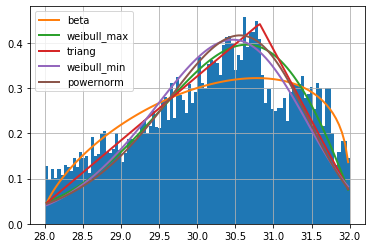

In [118]:
summaries[12].summary()

,sumsquare_error
vonmises_line,0.145118
beta,0.191175
weibull_min,0.363626
triang,0.368099
chi,0.397342


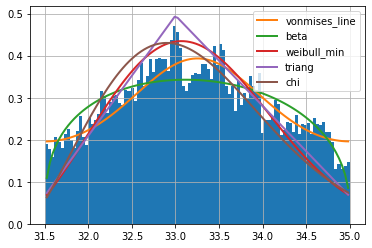

In [119]:
summaries[13].summary()

,sumsquare_error
beta,0.204022
weibull_max,0.277538
triang,0.333126
powernorm,0.418971
gumbel_l,0.422006


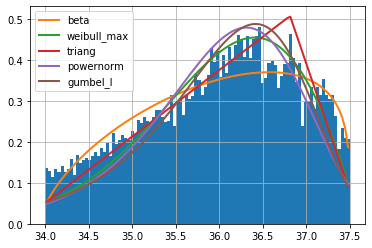

In [120]:
summaries[14].summary()

,sumsquare_error
triang,0.130916
chi,0.191769
powernorm,0.193372
gamma,0.198703
powerlognorm,0.203522


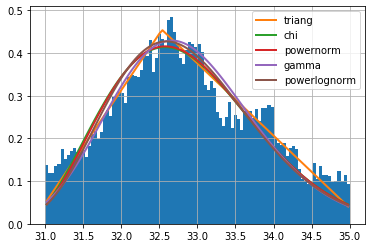

In [121]:
summaries[15].summary()

,sumsquare_error
triang,0.292298
rayleigh,0.296284
chi,0.300150
weibull_max,0.314807
gamma,0.315591


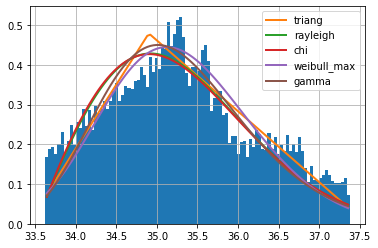

In [122]:
summaries[16].summary()

In [10]:
f.distributions

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'frechet_l',
 'frechet_r',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwobign',
 'laplace',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm',
 'rayleigh',
 'rdist',
 'rec

,sumsquare_error
triang,0.130916
chi,0.191769
powernorm,0.193372
gamma,0.198703
powerlognorm,0.203522


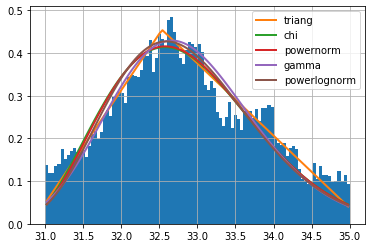

In [81]:

x = f.summary()
x


Fitted beta distribution with error=0.25152706754911736)
Fitted chi distribution with error=0.19176915414562515)
Fitted chi2 distribution with error=2.5009077983150414)
Fitted norm distribution with error=0.2686989245332662)
Fitted expon distribution with error=2.8933855159502846)
Fitted f distribution with error=0.20996250920915582)
Fitted gamma distribution with error=0.19870306128352083)
Fitted gumbel_l distribution with error=0.7742418166369639)
Fitted gumbel_r distribution with error=0.2959009417801303)
Fitted laplace distribution with error=0.6484991978066169)
Fitted logistic distribution with error=0.3179124462874074)
Fitted lognorm distribution with error=0.20439665722929415)
Fitted norm distribution with error=0.2686989245332662)
Fitted pareto distribution with error=3.085067612812061)
Fitted powerlaw distribution with error=1.1825852888568713)
Fitted powerlognorm distribution with error=0.20352167702162088)
Fitted powernorm distribution with error=0.19337201391218267)
Fitted 

,sumsquare_error
triang,0.130916
chi,0.191769
powernorm,0.193372
gamma,0.198703
powerlognorm,0.203522


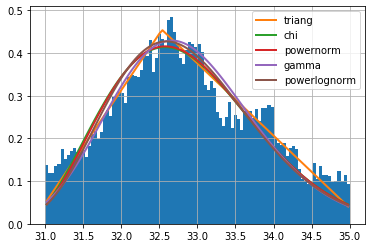

In [78]:
f.fit()
f.summary()

In [8]:
'Fitted lognorm distribution with error=0.05335509422773792)'

'Fitted lognorm distribution with error=0.05335509422773792)'

In [ ]:
all_roles_intermediates[4].Split.std()

In [ ]:
free_50_df["Time_Numeric"] = free_50_df["Time"].apply(to_timedelta)
free_50_df.head()

In [ ]:
free_50_df.sort_values(by=["Time_Numeric"])
free_50_df.head()

In [ ]:
# vector format: <Role, Competition Week, 8 Styles 4-tuples Results, Performance Label>

# Styles 4-tuples will be in alphabetical order according to their names

In [101]:
mean = sum(range(0, 17))/ 17
sigma =4.8989794855664
num_of_rows = 5000000
total_styles = 8

all_roles = np.random.randint(0, 17, num_of_rows)
competition_weeks = np.random.hypergeometric(1, 4, 1, size=num_of_rows)
total_distances = np.random.randint(6, 26, num_of_rows)
all_roles_df = pd.DataFrame(list(zip(all_roles, competition_weeks)), columns=["Role", "CompetitionWeek"])
all_roles_df.head()



,Role,CompetitionWeek
0,8,1
1,16,0
2,8,0
3,14,0
4,14,0


In [130]:
all_roles_df.CompetitionWeek.max()

1

23.679002376351857

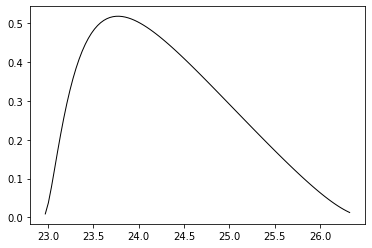

In [130]:
from scipy.stats import johnsonsb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)




x = np.linspace(johnsonsb.ppf(0.0001, a, b, loc, scale),
                johnsonsb.ppf(0.999, a, b, loc, scale), 100)
# ax.plot(x, johnsonsb.pdf(x, a, b, loc, scale),
#         label='johnsonsb pdf')
rv = johnsonsb(a, b, loc, scale)
ax.plot(x, rv.pdf(x), 'k-', lw=1, label='frozen pdf')
rv.rvs()

In [128]:
# 4-tuple format: (Style, Reps, Distance (m), Average_Split_Time)

In [132]:
num_back_results = num_of_rows # np.random.binomial(num_of_rows, np.random.uniform(0, 1, 1)[0] ,1) 
# num_back_results = num_back_results[0]
back_results_reps = np.random.randint(-1, 5, num_back_results)
back_results_distance_multiple = np.random.randint(1, 6, num_back_results)
back_results_split_time = johnsonsb.rvs(a = 0.64046, b = 0.98304, loc = 22.929, scale = 3.6768, size=num_back_results)
back_results_distances = [m*50 for m in back_results_distance_multiple]



# num_of_rows = num_of_rows - num_back_results

back_tuples = list(zip([0] * num_back_results, back_results_reps, back_results_distances, back_results_split_time))

num_back_results


5000000

In [133]:
num_breast_results = num_of_rows # np.random.binomial(num_of_rows, np.random.uniform(0, 1, 1)[0],1) 
# num_breast_results = num_breast_results[0]
breast_results_reps = np.random.randint(-1, 5, num_breast_results)
breast_results_distance_multiple = np.random.randint(1, 6, num_breast_results)
breast_results_split_time = johnsonsb.rvs(a = -0.04999, b = 0.63121, loc = 27.997, scale = 0.38251, size=num_breast_results)
breast_distances = [m*50 for m in breast_results_distance_multiple]



# num_of_rows = num_of_rows - num_breast_results

breast_tuples = list(zip([1] * num_breast_results, breast_results_reps, breast_distances, breast_results_split_time))
num_breast_results


5000000

In [134]:
num_butterfly_results = num_of_rows # np.random.binomial(num_of_rows, np.random.uniform(0, 1, 1)[0], 1) 
# num_butterfly_results = num_butterfly_results[0]
butterfly_results_reps = np.random.randint(-1, 5, num_butterfly_results)
butterfly_results_distance_multiple = np.random.randint(1, 6, num_butterfly_results)
butterfly_results_split_time = johnsonsb.rvs(a = -0.11814, b = 0.54569, loc = 24, scale = 0.22051, size=num_butterfly_results)
butterfly_distances = [m*50 for m in butterfly_results_distance_multiple]


# num_of_rows = num_of_rows - num_butterfly_results

butterfly_tuples = list(zip([2] * num_butterfly_results, butterfly_results_reps, butterfly_distances, butterfly_results_split_time))
num_butterfly_results

5000000

In [135]:
num_drill_results = num_of_rows # np.random.binomial(num_of_rows, np.random.uniform(0, 1, 1)[0], 1) 
# num_drill_results = num_drill_results[0]
num_drill_results_reps = np.random.randint(-1, 5, num_drill_results)
drill_results_distance_multiple = np.random.randint(1, 6, num_drill_results)
drill_results_split_time = johnsonsb.rvs(a = -0.2327, b = 0.64402, loc = 22.991, scale = 0.48926, size=num_drill_results)
drill_distances = [m*50 for m in drill_results_distance_multiple]


# num_of_rows = num_of_rows - num_drill_results

drill_tuples = list(zip([3] * num_drill_results, num_drill_results_reps, drill_distances, drill_results_split_time))
num_drill_results

5000000

In [136]:
num_free_results = num_of_rows # np.random.binomial(num_of_rows, np.random.uniform(0, 1, 1)[0], 1) 
# num_free_results = num_free_results[0]
num_free_results_reps = np.random.randint(-1, 5, num_free_results)
free_results_distance_multiple = np.random.randint(1, 6, num_free_results)
free_results_split_time = johnsonsb.rvs(a = -0.0858, b = 0.70014, loc = 22.997, scale = 0.23022, size=num_free_results)
free_distances = [m*50 for m in free_results_distance_multiple]



# num_of_rows = num_of_rows - num_free_results

free_tuples = list(zip([4] * num_free_results, num_free_results_reps, free_distances, free_results_split_time))
num_free_results

5000000

In [137]:
num_im_results = num_of_rows # np.random.binomial(num_of_rows, np.random.uniform(0, 1, 1)[0], 1) 
# num_im_results = num_im_results[0]
num_im_results_reps = np.random.randint(-1, 5, num_im_results)
im_results_distance_multiple = np.random.randint(1, 6, num_im_results)
im_results_split_time = johnsonsb.rvs(a = 0.02191, b = 0.56116, loc = 31, scale = 0.15111, size=num_im_results)
im_distances = [m*50 for m in im_results_distance_multiple]



im_tuples = list(zip([5]* num_im_results, num_im_results_reps, im_distances, im_results_split_time))
# num_of_rows = num_of_rows - num_im_results
num_im_results

5000000

In [138]:
num_kick_results = num_of_rows # np.random.binomial(num_of_rows, np.random.uniform(0, 1, 1)[0], 1) 
# num_kick_results = num_kick_results[0]
num_kick_results_reps = np.random.randint(-1, 5, num_kick_results)
kick_results_distance_multiple = np.random.randint(1, 6, num_kick_results)
kick_results_split_time = johnsonsb.rvs(a = -0.2327, b = 0.64402, loc = 22.991, scale = 0.48926, size=num_kick_results)
kick_distances = [m*50 for m in kick_results_distance_multiple]



# num_of_rows = num_of_rows - num_kick_results

kick_tuples = list(zip([6] * num_kick_results, num_kick_results_reps, kick_distances, kick_results_split_time))
num_kick_results

5000000

In [139]:
num_pull_paddle_results = num_of_rows # np.random.binomial(num_of_rows , np.random.uniform(0, 1, 1)[0], 1) 
# num_pull_paddle_results = num_pull_paddle_results[0]
num_pull_paddle_results_reps = np.random.randint(-1, 5, num_pull_paddle_results)
pull_paddle_results_distance_multiple = np.random.randint(1, 6, num_pull_paddle_results)
pull_paddle_results_split_time = johnsonsb.rvs(a = -0.2327, b = 0.64402, loc = 22.991, scale = 0.48926, size=num_pull_paddle_results)
pull_paddle_distances = [m*50 for m in pull_paddle_results_distance_multiple]


# num_of_rows = num_of_rows - num_pull_paddle_results
pull_paddle_tuples = list(zip([7] * num_pull_paddle_results, num_pull_paddle_results_reps, pull_paddle_distances, pull_paddle_results_split_time))
num_pull_paddle_results

5000000

In [ ]:
print(len(back_tuples), len(breast_tuples), len(butterfly_tuples), len(drill_tuples), len(free_tuples), len(im_tuples), len(kick_tuples), len(pull_paddle_tuples), sep="\n")
sum([len(back_tuples), len(breast_tuples), len(butterfly_tuples), len(drill_tuples), len(free_tuples), len(im_tuples), len(kick_tuples), len(pull_paddle_tuples)])

In [6]:
# results_td.head()
# results_td.to_csv("results_td.csv", index=False)
results_td = pd.read_csv("results_td.csv")
# results_td["Time"] = results_td["Time"].apply()
# results_td["Time"] = results_td["Time"].apply(to_timedelta)

results_td.head()
# amateurs.head()
# amateurs.to_csv("amateurs.csv", index=False)
amateurs = pd.read_csv("amateurs.csv")
amateurs.head()
# intermediates.head()
# intermediates.to_csv("intermediates.csv", index=False)
intermediates = pd.read_csv("intermediates.csv")
intermediates.head()
# pros.head()
# pros.to_csv("pros.csv", index=False)
pros = pd.read_csv("pros.csv")
pros.head()

,Distance,Meet,Year,Competition,Time,Event,Skill_Level,Reps,seconds,Split
0,50,Free,2009,2009 Bulgaria Open,0 days 00:00:23.800000000,0,2,1,23.8,23.8
1,50,Free,2009,USC Invitational,0 days 00:00:24.200000000,0,2,1,24.2,24.2
2,50,Free,2009,Southern Cal Invitational,0 days 00:00:24.200000000,0,2,1,24.2,24.2
3,50,Free,2009,2009 Iowa Swimming Summer State,0 days 00:00:24.400000000,0,2,1,24.4,24.4
4,50,Free,2009,2009 Bulgaria Open,0 days 00:00:24.400000000,0,2,1,24.4,24.4


,Event,Distance,Meet,Reps,seconds,Split,Skill_Level
0,0,50,Free,1,26.1,26.1,1
1,0,50,Free,1,26.1,26.1,1
2,0,50,Free,1,26.1,26.1,1
3,0,50,Free,1,26.1,26.1,1
4,0,50,Free,1,26.1,26.1,1


,Event,Distance,Meet,Reps,seconds,Split,Skill_Level
0,0,50,Free,1,23.8,23.8,2
1,0,50,Free,1,24.2,24.2,2
2,0,50,Free,1,24.2,24.2,2
3,0,50,Free,1,24.4,24.4,2
4,0,50,Free,1,24.4,24.4,2


,Event,Distance,Meet,Reps,seconds,Split,Skill_Level
0,0,50,Free,1,21.7,21.7,3
1,0,50,Free,1,22.0,22.0,3
2,0,50,Free,1,22.1,22.1,3
3,0,50,Free,1,22.2,22.2,3
4,0,50,Free,1,22.6,22.6,3


In [140]:
back_df = pd.DataFrame(back_tuples, columns =['Style', 'BackReps', 'BackDistance', 'BackAverageSplit'])
back_df.to_csv("back_tuples.csv", index=False)
# back_df = pd.read_csv("back_tuples.csv")
# back_df.head()

In [141]:
breast_df = pd.DataFrame(breast_tuples, columns =['Style', 'BreastReps', 'BreastDistance', 'BreastAverageSplit'])
breast_df.to_csv("breast_tuples.csv", index=False)
# breast_df = pd.read_csv("breast_tuples.csv")
# breast_df.head()

In [142]:
butterfly_df = pd.DataFrame(butterfly_tuples, columns =['Style', 'ButterflyReps', 'ButterflyDistance', 'ButterflyAverageSplit'])
butterfly_df.to_csv("butterfly_tuples.csv", index=False)
# butterfly_df = pd.read_csv("butterfly_tuples.csv")
# butterfly_df.head()

In [143]:
drill_df = pd.DataFrame(drill_tuples, columns =['Style', 'DrillReps', 'DrillDistance', 'DrillAverageSplit'])
drill_df.to_csv("drill_tuples.csv", index=False)
# drill_df = pd.read_csv("drill_tuples.csv")
# drill_df.head()

In [144]:
free_df = pd.DataFrame(free_tuples, columns =['Style', 'FreeReps', 'FreeDistance', 'FreeAverageSplit'])
free_df.to_csv("free_tuples.csv", index=False)
# free_df = pd.read_csv("free_tuples.csv")
# free_df.head()
# print(len(free_df))

In [145]:
im_df = pd.DataFrame(im_tuples, columns =['Style', 'ImReps', 'ImDistance', 'ImAverageSplit'])
im_df.to_csv("im_tuples.csv", index=False)
# im_df = pd.read_csv("im_tuples.csv")
# im_df.head()

In [146]:
kick_df = pd.DataFrame(kick_tuples, columns =['Style', 'KickReps', 'KickDistance', 'KickAverageSplit'])
kick_df.to_csv("kick_tuples.csv", index=False)
# kick_df = pd.read_csv("kick_tuples.csv")
# kick_df.head()

In [147]:
pull_paddle_df = pd.DataFrame(pull_paddle_tuples, columns =['Style', 'PullPaddleReps', 'PullPaddleDistance', 'PullPaddleAverageSplit'])
pull_paddle_df.to_csv("pull_paddle_tuples.csv", index=False)
# pull_paddle_df = pd.read_csv("pull_paddle_tuples.csv")
# pull_paddle_df.head()

In [ ]:
pull_paddle_splits = pull_paddle_df["Average Split"]
k2, p = stats.normaltest(pull_paddle_splits)
print("k2: " + str(k2), "p: " + str(p), sep="\n")

In [ ]:
temp = intermediates_dff[intermediates_dff["Event"] > 5]
intermediates_splits = temp[temp["Event"] < 9]["Split"]
k2, p = stats.normaltest(intermediates_splits)
print("k2: " + str(k2), "p: " + str(p), sep="\n")

In [148]:
results_tuples_df = pd.concat([back_df.drop(columns=["Style"]), breast_df.drop(columns=["Style"]), butterfly_df.drop(columns=["Style"]), drill_df.drop(columns=["Style"]), free_df.drop(columns=["Style"]), im_df.drop(columns=["Style"]), kick_df.drop(columns=["Style"]), pull_paddle_df.drop(columns=["Style"])], axis=1, sort=False)

results_tuples_df["TotalDistance"] = (results_tuples_df.BackReps * results_tuples_df.BackDistance) + (results_tuples_df.BreastReps * results_tuples_df.BreastDistance) + (results_tuples_df.ButterflyReps * results_tuples_df.ButterflyDistance) + (results_tuples_df.DrillReps * results_tuples_df.DrillDistance) + (results_tuples_df.FreeReps * results_tuples_df.FreeDistance) + (results_tuples_df.ImReps * results_tuples_df.ImDistance) + (results_tuples_df.KickReps * results_tuples_df.KickDistance) + (results_tuples_df.PullPaddleReps * results_tuples_df.PullPaddleDistance)
results_tuples_df.head()

,BackReps,BackDistance,BackAverageSplit,BreastReps,BreastDistance,BreastAverageSplit,ButterflyReps,ButterflyDistance,ButterflyAverageSplit,DrillReps,...,ImReps,ImDistance,ImAverageSplit,KickReps,KickDistance,KickAverageSplit,PullPaddleReps,PullPaddleDistance,PullPaddleAverageSplit,TotalDistance
0,1,250,24.635433,2,150,28.135132,0,250,24.099281,-1,...,-1,100,31.123539,-1,200,23.199395,3,50,23.389735,250
1,-1,200,25.561106,3,50,28.008715,2,100,24.044041,3,...,4,200,31.145723,4,200,23.264809,4,200,23.428706,3250
2,-1,250,24.606769,-1,150,28.135500,1,50,24.080833,3,...,-1,200,31.024401,2,200,22.997363,1,150,23.013620,600
3,4,150,24.289038,4,250,28.143811,1,200,24.056979,4,...,-1,150,31.069544,4,100,23.455924,4,50,23.437668,3200
4,3,250,23.452265,-1,200,28.254576,3,200,24.071452,4,...,0,250,31.116170,1,250,23.215451,0,250,23.093204,1800


In [149]:
results_tuples_df.TotalDistance.max()

6900

In [152]:
results_tuples_df.TotalDistance.min()

1050

In [151]:
results_tuples_df = results_tuples_df[results_tuples_df.TotalDistance > 1000]

train_vector_input = pd.concat([all_roles_df, results_tuples_df], axis=1, sort=False, join='inner')
train_vector_input.head()


,Role,CompetitionWeek,BackReps,BackDistance,BackAverageSplit,BreastReps,BreastDistance,BreastAverageSplit,ButterflyReps,ButterflyDistance,...,ImReps,ImDistance,ImAverageSplit,KickReps,KickDistance,KickAverageSplit,PullPaddleReps,PullPaddleDistance,PullPaddleAverageSplit,TotalDistance
1,16,0,-1,200,25.561106,3,50,28.008715,2,100,...,4,200,31.145723,4,200,23.264809,4,200,23.428706,3250
3,14,0,4,150,24.289038,4,250,28.143811,1,200,...,-1,150,31.069544,4,100,23.455924,4,50,23.437668,3200
4,14,0,3,250,23.452265,-1,200,28.254576,3,200,...,0,250,31.116170,1,250,23.215451,0,250,23.093204,1800
6,2,1,0,150,24.631736,3,200,28.163791,4,50,...,3,100,31.056530,2,50,23.368108,4,200,23.334532,2900
7,1,0,0,150,23.736407,0,50,28.143855,1,200,...,2,250,31.068211,0,50,23.125088,3,100,23.409481,1600


In [159]:
back_df.head()

,Style,BackReps,BackDistance,BackAverageSplit
0,0,1,250,24.635433
1,0,-1,200,25.561106
2,0,-1,250,24.606769
3,0,4,150,24.289038
4,0,3,250,23.452265


In [6]:
mean_and_std = []
min_performers = []
intermediates = results[results.Skill_Level == 2]
for i in range(0, 17):
    m = intermediates[intermediates.Event == i].Split.mean()
    s = intermediates[intermediates.Event == i].Split.std()
    min_performer = round(np.percentile(intermediates[intermediates.Event == i].Split, 1), 3)
    min_performers.append(m)
    print(min_performer, str(round(m+s, 3)), sep='\t')
    

23.06	25.019
26.015	27.82
28.032	29.59
30.034	32.184
30.903	34.536
31.752	34.689
26.11	29.09
28.065	30.426
30.822	33.617
24.08	26.444
27.06	29.168
30.32	32.882
28.09	31.247
31.56	34.109
34.08	36.879
31.078	33.799
33.681	36.199


In [118]:
round(np.percentile(intermediates[intermediates.Event == 4].Split, 15), 3)

31.962

In [112]:
intermediates[intermediates.Event == 0][intermediates.Split < 23.9].Split.count()/intermediates[intermediates.Event == 0].Split.count()

c:\users\luisr\miniconda3\envs\coaching-env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.34271743258640336

In [26]:
np.percentile(intermediates[intermediates.Event == 0].Split, 80)

24.9

In [7]:
def check_performance(row):
#     print(row)
    tuples = [(row[2], row[4]), (row[5], row[7]), (row[8], row[10]), (row[11], row[13]), (row[14], row[16]), (row[17], row[19]), (row[20], row[22]), (row[23], row[25])]
    count = 0
    total = 0
    max_time = min_performers[int(row[0])]
    for tup in tuples:
        if tup[0] == 0:
            continue
        total = total + 1 
        if max_time >= tup[1]:
            count = count + 1
            
    if count >= (3*total)/4:
        return 1
    return 0
    
# def mean_split(row):
    

In [154]:
train_vector_input.BackReps.replace(-1, 0).head()

1    0
3    4
4    3
6    0
7    0
Name: BackReps, dtype: int64

In [156]:
train_vector_input["BackReps"] = train_vector_input.BackReps.replace(-1, 0)
train_vector_input = train_vector_input.replace(-1, 0)
train_vector_input.loc[train_vector_input.BackReps == 0, ["BackDistance", "BackAverageSplit"]] = 0, 0
train_vector_input.loc[train_vector_input.BreastReps == 0, ["BreastDistance", "BreastAverageSplit"]] = 0, 0
train_vector_input.loc[train_vector_input.ButterflyReps == 0, ["ButterflyDistance", "ButterflyAverageSplit"]] = 0, 0
train_vector_input.loc[train_vector_input.DrillReps == 0, ["DrillDistance", "DrillAverageSplit"]] = 0, 0
train_vector_input.loc[train_vector_input.FreeReps == 0, ["FreeDistance", "FreeAverageSplit"]] = 0, 0
train_vector_input.loc[train_vector_input.ImReps == 0, ["ImDistance", "ImAverageSplit"]] = 0, 0
train_vector_input.loc[train_vector_input.KickReps == 0, ["KickDistance", "KickAverageSplit"]] = 0, 0
train_vector_input.loc[train_vector_input.PullPaddleReps == 0, ["PullPaddleDistance", "PullPaddleAverageSplit"]] = 0, 0

In [157]:
train_vector_input["TotalDistance"] = (train_vector_input.BackReps * train_vector_input.BackDistance) + (train_vector_input.BreastReps * train_vector_input.BreastDistance) + (train_vector_input.ButterflyReps * train_vector_input.ButterflyDistance) + (train_vector_input.DrillReps * train_vector_input.DrillDistance) + (train_vector_input.FreeReps * train_vector_input.FreeDistance) + (train_vector_input.ImReps * train_vector_input.ImDistance) + (train_vector_input.KickReps * train_vector_input.KickDistance) + (train_vector_input.PullPaddleReps * train_vector_input.PullPaddleDistance)

In [8]:
# train_vector_input.to_csv("vector_input.csv", index=False)
train_vector_input = pd.read_csv("vector_input.csv")

In [9]:
train_vector_input["Label"] = train_vector_input.apply(check_performance, axis=1)

In [10]:
train_vector_input.Label[train_vector_input.Label == 0].count()/train_vector_input.Role.count()

0.11448661315732023

In [12]:
styles = ['Back', 'Breast','Butterfly','Drill',
          'Free','Im', 'Kick','PullPaddle']

with_role = train_vector_input[train_vector_input.Role ==1]
for style in styles:    
    with_style = with_role[with_role[style+"Reps"] > 0]
    m0 = with_style[with_style.Label == 0][style+"AverageSplit"].mean()
    m1 = with_style[with_style.Label == 1][style+"AverageSplit"].mean()
    print(m0, m1, m0-m1, style, sep="\t")

24.283781921475054	24.285568147673523	-0.0017862261984689098	Back
28.19383915110071	28.193723360952436	0.00011579014827489686	Breast
24.118066220897333	24.11780622995068	0.00025999094665252187	Butterfly
23.26610974705834	23.26612156955239	-1.1822494048630006e-05	Drill
23.116620514890954	23.117270057769556	-0.0006495428786017499	Free
31.074365727026013	31.074557889657022	-0.0001921626310092961	Im
23.265751294366773	23.265798049788117	-4.675542134435773e-05	Kick
23.26652350263726	23.266078314493246	0.00044518814401328655	PullPaddle


In [96]:
train_vector_input.FreeAverageSplit[train_vector_input.FreeReps > 0][train_vector_input.Label == 1].max()

23.227025134213772

In [88]:
train_vector_input.head()

,Role,CompetitionWeek,BackReps,BackDistance,BackAverageSplit,BreastReps,BreastDistance,BreastAverageSplit,ButterflyReps,ButterflyDistance,...,ImDistance,ImAverageSplit,KickReps,KickDistance,KickAverageSplit,PullPaddleReps,PullPaddleDistance,PullPaddleAverageSplit,TotalDistance,Label
0,16,0,0,0,0.000000,3,50,28.008715,2,100,...,200,31.145723,4,200,23.264809,4,200,23.428706,3450,1
1,14,0,4,150,24.289038,4,250,28.143811,1,200,...,0,0.000000,4,100,23.455924,4,50,23.437668,3350,1
2,14,0,3,250,23.452265,0,0,0.000000,3,200,...,0,0.000000,1,250,23.215451,0,0,0.000000,2000,1
3,2,1,0,0,0.000000,3,200,28.163791,4,50,...,100,31.056530,2,50,23.368108,4,200,23.334532,2900,1
4,1,0,0,0,0.000000,0,0,0.000000,1,200,...,250,31.068211,0,0,0.000000,3,100,23.409481,1600,1


In [ ]:
train_vector_input.Label[train_vector_input.Label]

In [1]:
import tensorflow as tf
withtf.device('/device:GPU:0')